In [13]:
import numpy as np
from os import makedirs

# Evolutionary experiment path
evomol_exp_dict = {
    "Evolutionary optimization only" : "output/01_EA_baseline" 
}

# BBO experiments paths
BBO_exp_dict = {
    "BBO(Shingles, ·)": "output/03_BBO_SHINGLES_DP",
    "BBO(MBTR, RBF)": "output/02_BBO_MBTR_RBF"
}

# Names of the different runs (runs that are not defined will be ignored)
sub_experiments_names = [str(i) for i in range(1, 11)]

# Output destination of figures
output_figures_path = "output/04_figures"
makedirs(output_figures_path, exist_ok=True)

# Numerical targets for ECDF representation and ERT measure
ECDF_TARGETS = np.arange(-10, -1, 0.01)
ERT_TARGETS = np.arange(-10, -1, 1)



## Extracting results

In [14]:
from bbomol.postprocessing.postprocessing import extract_multiple_BBO_experiments_data, extract_multiple_evomol_experiments_data

def extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names):
    
    results_dict = {}
    
    for exp_name, path in BBO_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_BBO_experiments_data(path, sub_experiments_names)
        
    for exp_name, path in EvoMol_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_evomol_experiments_data(path, sub_experiments_names)

    return results_dict


In [15]:
results_dict = extract_all_data(BBO_exp_dict, evomol_exp_dict, sub_experiments_names)

## Empirical cumulative distribution functions (ECDF)

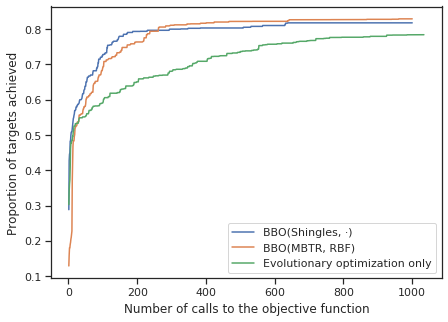

In [16]:
from bbomol.postprocessing.plot import plot_ecdf

plot_ecdf(results_dict, ecdf_targets=ECDF_TARGETS)

## Expected running time (ERT)

In [19]:
from bbomol.postprocessing.plot import display_ert

display_ert(results_dict, ert_targets=ERT_TARGETS)

,Experiment,-10,-9,-8,-7,-6,-5,-4,-3,-2
0,"BBO(Shingles, ·)",1,1,2,2,3,18,64,377,inf
1,"BBO(MBTR, RBF)",1,1,9,12,13,32,108,177,inf
2,Evolutionary optimization only,2,2,2,2,5,46,235,1186,inf


In [22]:
display_ert(results_dict, ert_targets=ERT_TARGETS, xunit="time")

/home/jleguy/anaconda3/envs/chem2020/lib/python3.6/site-packages/bbomol/postprocessing/evaluation.py:185: RuntimeWarning: All-NaN slice encountered
  best_so_far_values.append(np.nanmax(obj_values_list[j][timestamps <= curr_timestamp]))
/home/jleguy/anaconda3/envs/chem2020/lib/python3.6/site-packages/bbomol/postprocessing/evaluation.py:195: RuntimeWarning: invalid value encountered in greater_equal
  success_targets_matrix = best_so_far_matrix.T >= target_value


,Experiment,-10,-9,-8,-7,-6,-5,-4,-3,-2
0,"BBO(Shingles, ·)",1850,1850,1850,1850,1850,6860,27560,100288,inf
1,"BBO(MBTR, RBF)",380,380,670,870,930,3820,25220,40590,inf
2,Evolutionary optimization only,110,130,130,130,240,2350,33550,267243,inf
